                                              Домашнее задание №1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
%matplotlib inline
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [2]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2

In [4]:
# скалярное произведение двух векторов
np.dot(x1,x2)

234704.86490859918

In [5]:
#скалярное произведение двух векторов
def vec_dot(x, y):
    s = 0
    for i in range(len(x)):
        s+=x[i]*y[i]
    return s
vec_dot(x1, x2)

234704.86490859918

In [6]:
v1 = np.array(data.loc[5, ['RM', 'LSTAT']])
v2 = np.array(data.loc[15, ['RM', 'LSTAT']])
print(np.dot(v1,v2), vec_dot(v1,v2))

81.64132000000001 81.64132000000001


In [7]:
#Косинуc и расстояние между векторами
cosin = np.dot(v1,v2)/(np.linalg.norm(v1,2)*np.linalg.norm(v2,2))
d = np.linalg.norm((v2 - v1),2)
print(cosin, d)

0.9591910090954906 3.314033192350373


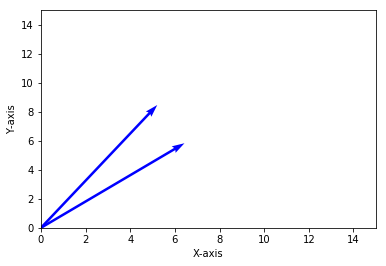

In [8]:
plt.figure()
plt.ylabel('Y-axis')
plt.xlabel('X-axis')
ax = plt.gca()
ax.quiver((0,0), (0,0), v1, v2, color='b', angles='xy', scale_units='xy',scale=1)
ax.set_xlim([0, 15])
ax.set_ylim([0, 15])
plt.draw()
plt.show()

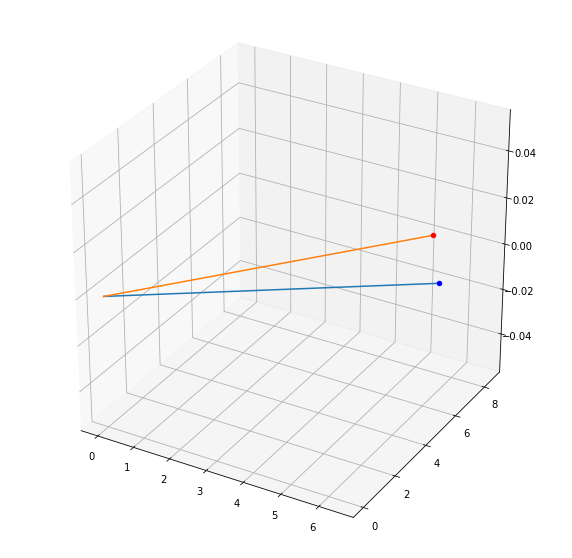

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

x = v1
y = v2

ax.plot([0,x[0]], [0,y[0]])
ax.plot([0,x[1]], [0,y[1]])

ax.scatter(x[0], y[0], c='b', marker='o')
ax.scatter(x[1], y[1], c='r', marker='o')


plt.show()

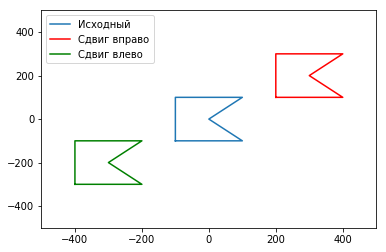

In [10]:
#сместить по оси x на 300 пикселей, по оси y на 200 пикселей
A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
new_x = 300*np.ones(x.shape)
new_y = 200*np.ones(x.shape)
x = A[:,0] + new_x
y = A[:,1] + new_y
plt.plot(x, y, color = 'r')
x = A[:,0] - new_x
y = A[:,1] - new_y
plt.plot(x, y, color = 'g')
plt.ylim([-500, 500])
plt.xlim([-500, 500])
plt.legend(['Исходный', 'Сдвиг вправо', 'Сдвиг влево'])

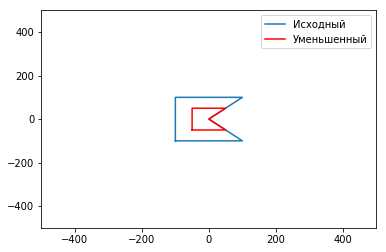

In [11]:
#Уменьшить объект в два раза.
B = 0.5*A
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
x = B[:,0] 
y = B[:,1]
plt.plot(x, y, color = 'r')
plt.ylim([-500, 500])
plt.xlim([-500, 500])
plt.legend(['Исходный', 'Уменьшенный'])

In [12]:
#Поворот на 130 градусов
from math import cos, sin, pi

theta = 130 * 180/pi
TransformArray = np.array([
    [cos(theta), -sin(theta), 0],
    [sin(theta), cos(theta), 0],
    [0, 0, 1]
])

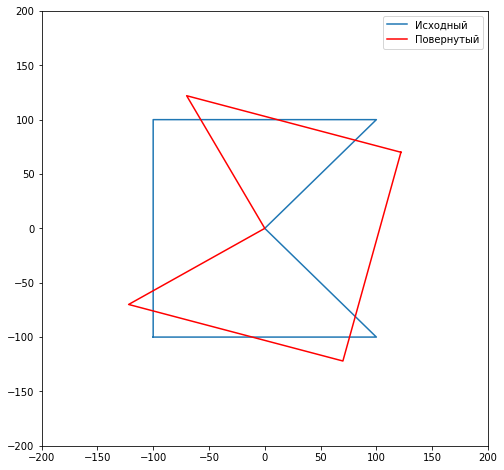

In [13]:
C = np.array(TransformArray.dot(A.transpose())).astype(int)
B_new = C.transpose()
plt.figure(
    figsize=(8, 8),
    )
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
x = B_new[:,0] 
y = B_new[:,1]
plt.plot(x, y, color = 'r')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['Исходный', 'Повернутый'])

In [14]:
OtrArray = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1]
])

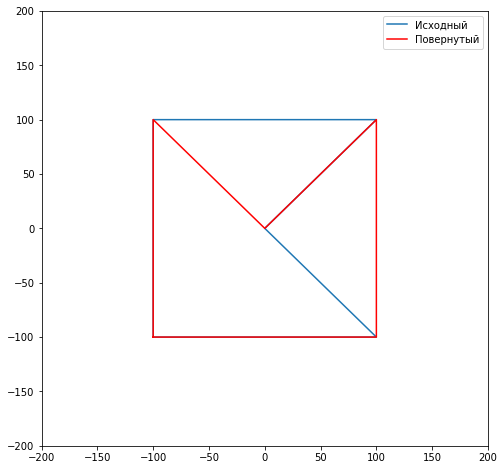

In [15]:
C = np.array(OtrArray.dot(A.transpose())).astype(int)
B = C.transpose()
plt.figure(
    figsize=(8, 8),
    )
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
x = B[:,0] 
y = B[:,1]
plt.plot(x, y, color = 'r')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['Исходный', 'Повернутый'])

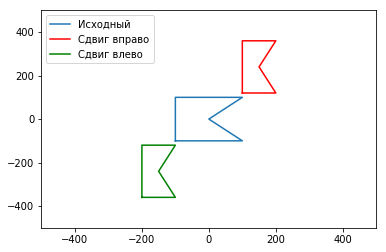

In [16]:
# Смещение на (200, 300) и масштабирование на (0.5, 1,2)
A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
new_x = 300*np.ones(x.shape)
new_y = 200*np.ones(x.shape)
x = 0.5*(A[:,0] + new_x)
y = 1.2*(A[:,1] + new_y)
plt.plot(x, y, color = 'r')
x = 0.5*(A[:,0] - new_x)
y = 1.2*(A[:,1] - new_y)
plt.plot(x, y, color = 'g')
plt.ylim([-500, 500])
plt.xlim([-500, 500])
plt.legend(['Исходный', 'Сдвиг вправо', 'Сдвиг влево'])